In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [2]:
df =pd.read_csv("drugdata.csv")

In [3]:
df.head()


,ID,Age,Age Group,Sex,BP,Cholesterol,Drug
0,1,23,Adult,F,HIGH,HIGH,drugY
1,2,47,Adult,M,LOW,HIGH,drugC
2,3,47,Adult,M,LOW,HIGH,drugC
3,4,28,Adult,F,NORMAL,HIGH,drugX
4,5,61,Adult,F,LOW,HIGH,drugY


In [4]:
X = df.iloc[:,:-1]

In [5]:
X

,ID,Age,Age Group,Sex,BP,Cholesterol
0,1,23,Adult,F,HIGH,HIGH
1,2,47,Adult,M,LOW,HIGH
2,3,47,Adult,M,LOW,HIGH
3,4,28,Adult,F,NORMAL,HIGH
4,5,61,Adult,F,LOW,HIGH
...,...,...,...,...,...,...
195,196,56,Adult,F,LOW,HIGH
196,197,16,Child,M,LOW,HIGH
197,198,52,Adult,M,NORMAL,HIGH
198,199,23,Adult,M,NORMAL,NORMAL


In [6]:
y = df.iloc[:,6]

In [7]:
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
labelencoder_x=LabelEncoder()

In [10]:
X = X.apply(LabelEncoder().fit_transform) 

In [11]:
X

,ID,Age,Age Group,Sex,BP,Cholesterol
0,0,8,0,0,0,0
1,1,30,0,1,1,0
2,2,30,0,1,1,0
3,3,12,0,0,2,0
4,4,44,0,0,1,0
...,...,...,...,...,...,...
195,195,39,0,0,1,0
196,196,1,1,1,1,0
197,197,35,0,1,2,0
198,198,8,0,1,2,1


In [19]:
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [12]:
feature_cols = ['ID', 'Age', 'Age Group', 'Sex', 'BP', 'Cholestrol']

In [13]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [14]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [15]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.36666666666666664


In [16]:
len(y)

200

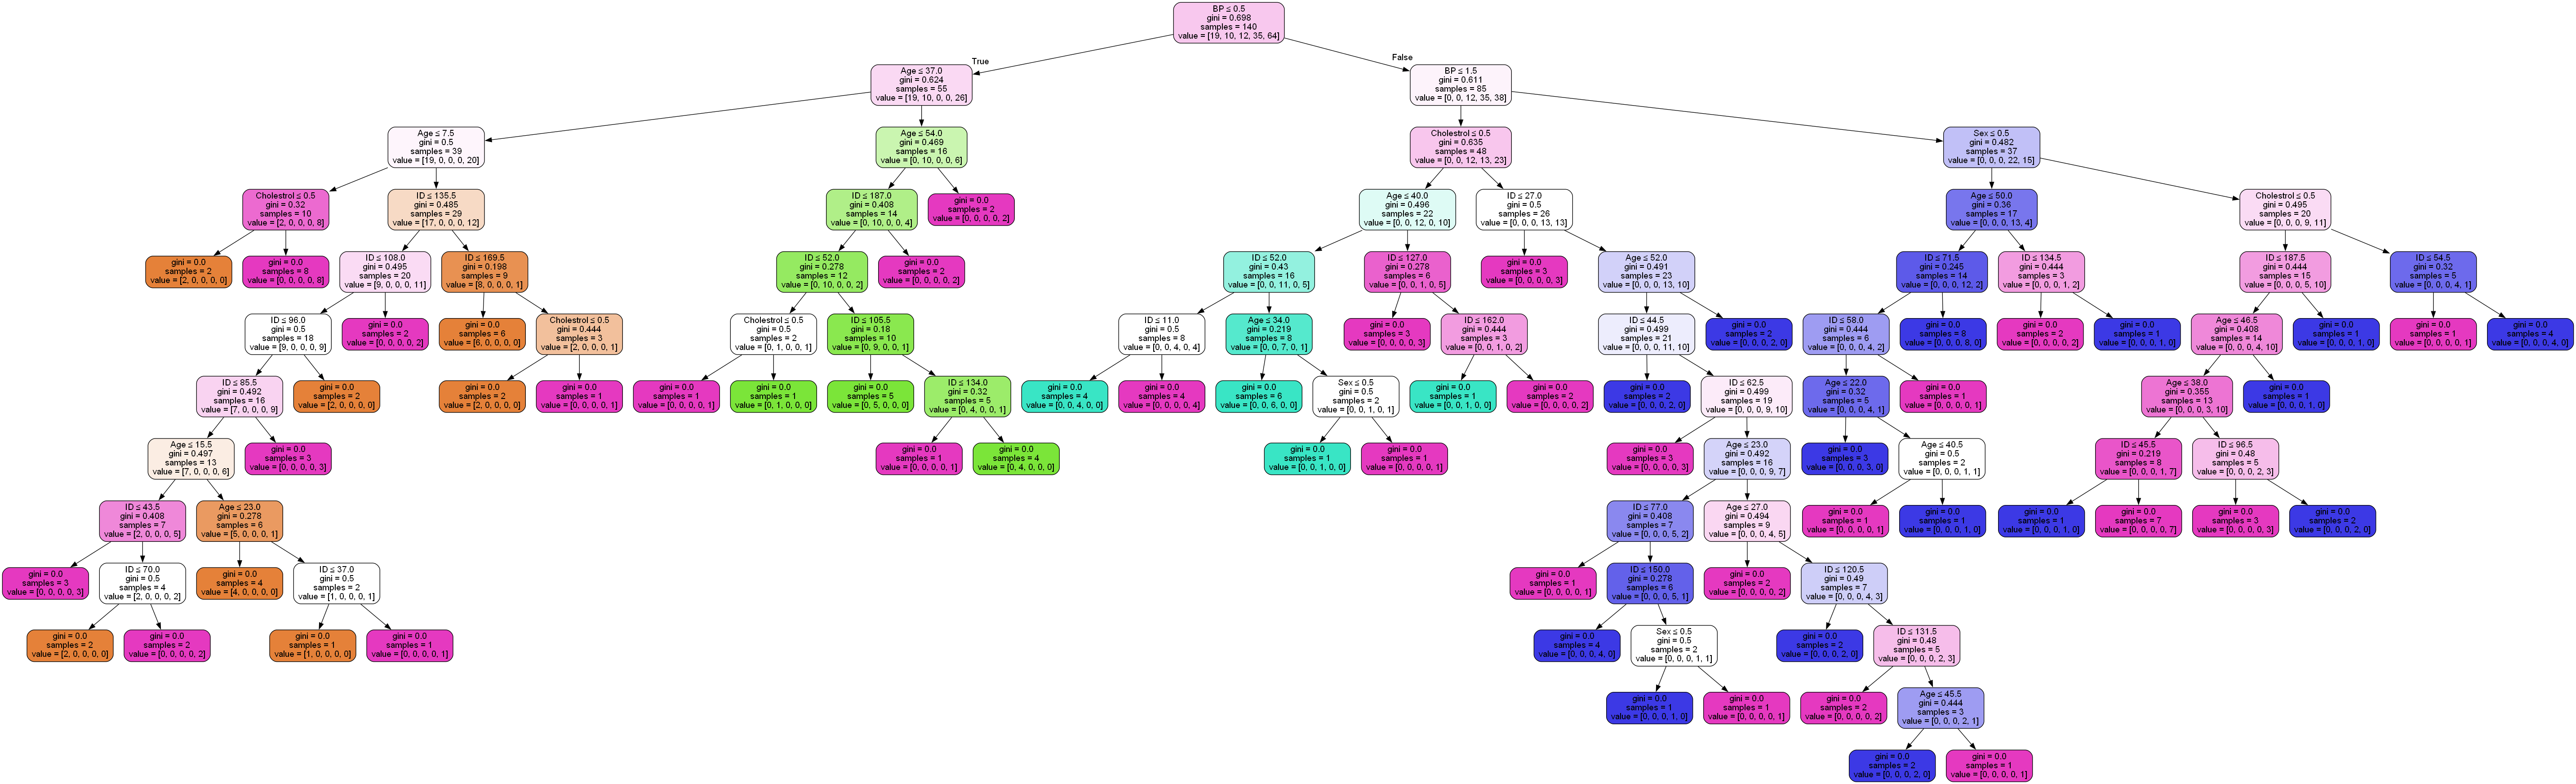

In [18]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  filled=True, rounded=True, special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())
